In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8) #Adjusts the configuration of the plots

In [2]:
#Importing Data
df= pd.read_csv(r'C:\Users\Ncs\Downloads\movies.csv')

In [3]:
#Exploring the Data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Checking for NA Percentage in Each Column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
#Dropping Rows with NA Values in rating, gross and budget Columns
df.dropna(how= 'any', subset=['rating', 'gross', 'budget'], inplace= True)

In [6]:
#Checking Observation Number and Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5424 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5424 non-null   object 
 3   year      5424 non-null   int64  
 4   released  5424 non-null   object 
 5   score     5424 non-null   float64
 6   votes     5424 non-null   float64
 7   director  5424 non-null   object 
 8   writer    5424 non-null   object 
 9   star      5424 non-null   object 
 10  country   5424 non-null   object 
 11  budget    5424 non-null   float64
 12  gross     5424 non-null   float64
 13  company   5422 non-null   object 
 14  runtime   5423 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 678.0+ KB


In [7]:
#Changing Data Type of Columns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [8]:
#Removing Country Name From release Column
df['released']=df['released'].str.split('(').str[0]

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
#Calculating Correlation (numerical variables)
df.corr(method= 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056506,0.206161,0.327961,0.274395,0.075173
score,0.056506,1.000000,0.474349,0.072155,0.222709,0.414145
votes,0.206161,0.474349,1.000000,0.439757,0.614808,0.352331
budget,0.327961,0.072155,0.439757,1.000000,0.740263,0.318718
gross,0.274395,0.222709,0.614808,0.740263,1.000000,0.275830
runtime,0.075173,0.414145,0.352331,0.318718,0.275830,1.000000


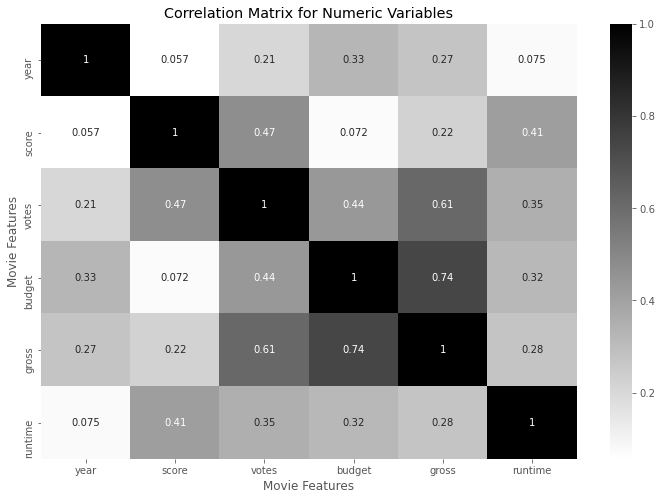

In [11]:
#Creating Correlation Matrix of Numerical Variables
correlation_matrix= df.corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot= True, cmap = 'gray_r')
plt.title('Correlation Matrix for Numeric Variables')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

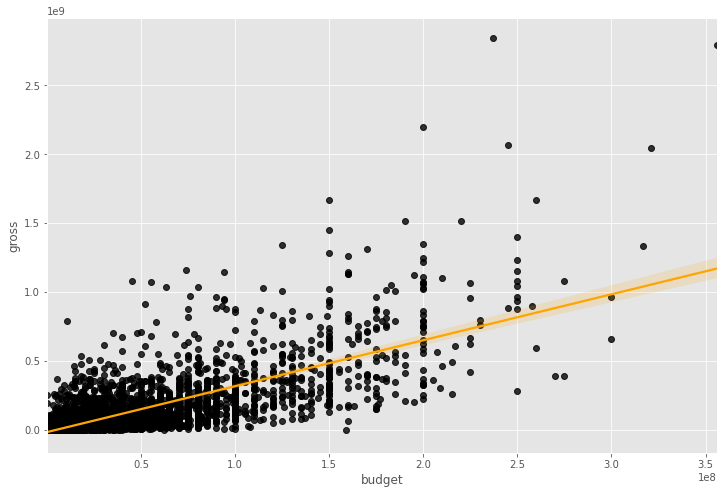

In [12]:
#Plot Budget vs Gross Using Seaborn
sns.regplot(x='budget', y='gross', data= df, scatter_kws= {'color':'black'}, line_kws={'color':'orange'})

<AxesSubplot:xlabel='votes', ylabel='gross'>

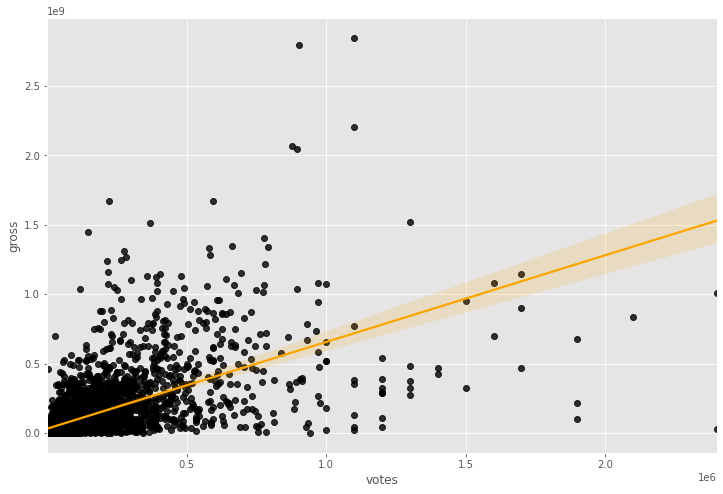

In [13]:
#Plot Votes vs Gross Using Seaborn
sns.regplot(x='votes', y='gross', data= df, scatter_kws= {'color':'black'}, line_kws={'color':'orange'})

<AxesSubplot:xlabel='runtime', ylabel='gross'>

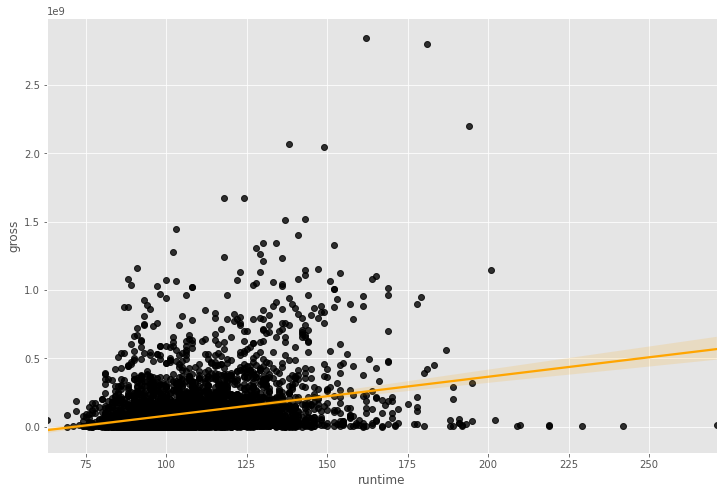

In [14]:
#Plot Runtime vs Gross Using Seaborn
sns.regplot(x='runtime', y='gross', data= df, scatter_kws= {'color':'black'}, line_kws={'color':'orange'})

In [15]:
#Turning Categorical Variables into Numbers
df_numerized= df.iloc[:]

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4695,6,6,1980,1239,8.4,927000.0,1797,2834,699,46,19000000,46998772,1426,146.0
1,3932,6,1,1980,1065,5.8,65000.0,1579,1159,214,47,4500000,58853106,452,104.0
2,3643,4,0,1980,1288,8.7,1200000.0,757,1819,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1065,7.7,221000.0,889,1414,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1108,7.3,108000.0,719,352,271,47,6000000,39846344,1083,98.0


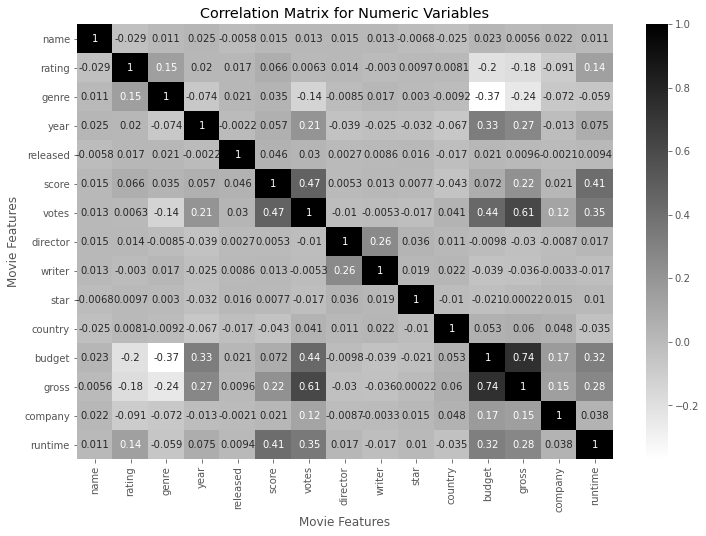

In [16]:
#Creating Correlation Matrix of All Variables
correlation_matrix= df_numerized.corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot= True, cmap = 'gray_r')
plt.title('Correlation Matrix for Numeric Variables')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

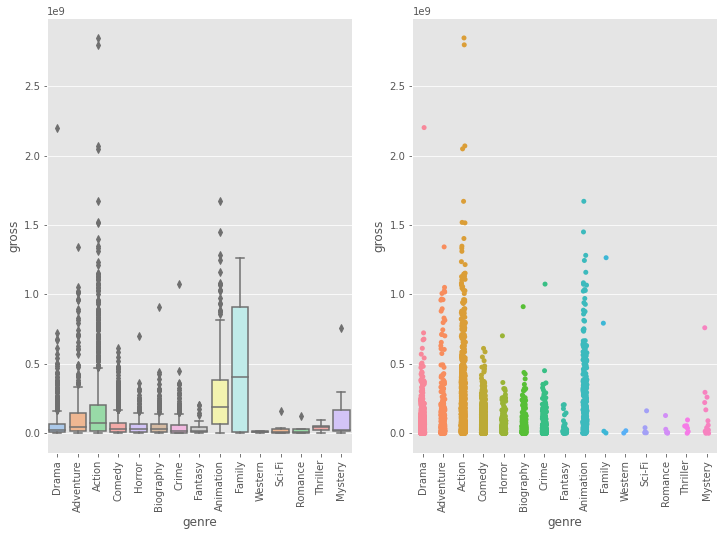

In [17]:
#Boxplot and Stripplot of Movie Revenues vs Movie Genre
plt.subplot(1, 2, 1)
ax= sns.boxplot(x= "genre", y= 'gross', data=df, palette= 'pastel')
ax.tick_params(axis='x', rotation= 90)
plt.subplot(1, 2, 2)
axx=sns.stripplot(x="genre", y="gross", data=df)
axx.tick_params(axis='x', rotation= 90)

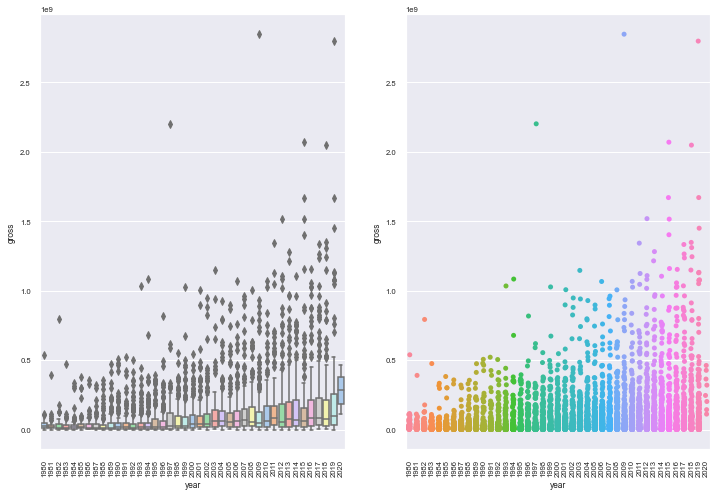

In [18]:
#Boxplot and Stripplot of Movie Revenues vs Release Year
sns.set(font_scale = 0.7)
plt.subplot(1, 2, 1)
ax= sns.boxplot(x= "year", y= 'gross', data=df, palette= 'pastel')
ax.tick_params(axis='x', rotation= 90)
plt.subplot(1, 2, 2)
axx=sns.stripplot(x="year", y="gross", data=df)
axx.tick_params(axis='x', rotation= 90)

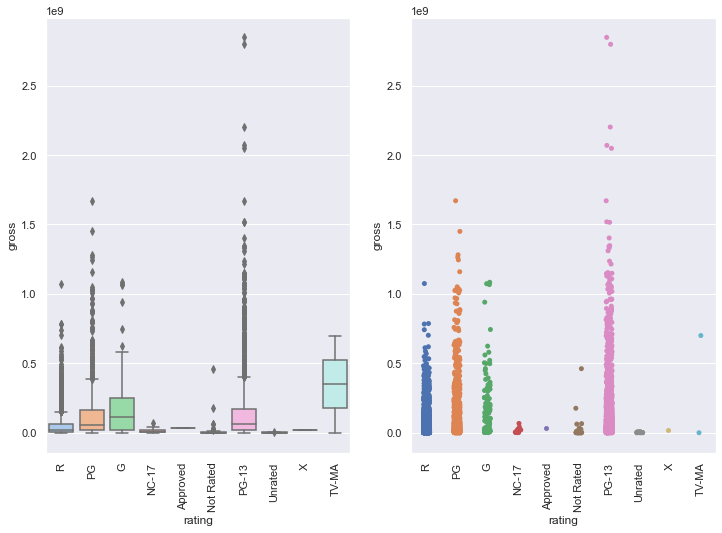

In [21]:
#Boxplot and Stripplot of Movie Revenues vs Movie Rating
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
ax= sns.boxplot(x= "rating", y= 'gross', data=df, palette= 'pastel')
ax.tick_params(axis='x', rotation= 90)
plt.subplot(1, 2, 2)
axx=sns.stripplot(x="rating", y="gross", data=df)
axx.tick_params(axis='x', rotation= 90)